# Auto MPG Analysis: Exploratory Data Analysis & Regression Modeling

**Dataset Source:** UCI Machine Learning Repository - Auto MPG Dataset

**Objective:** Analyze factors affecting fuel efficiency and build predictive models

## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

## 2. Load Dataset

In [2]:
# Use relative path for portability
df = pd.read_csv("auto-mpg.csv", delim_whitespace=True, header=None)


**Note:** Separated the values by their spaces and read the dataset without headers

## 3. Dataset Overview

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


In [4]:
# Assign column names
df.columns = [
    "mpg",
    "cylinders",
    "displacement",
    "horsepower",
    "weight",
    "acceleration",
    "model_year",
    "origin",
    "car_name"
]

In [5]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    float64
 2   displacement  406 non-null    float64
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    float64
 5   acceleration  406 non-null    float64
 6   model_year    406 non-null    float64
 7   origin        406 non-null    float64
 8   car_name      406 non-null    object 
dtypes: float64(8), object(1)
memory usage: 28.7+ KB


In [7]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64


In [8]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,406.000000,406.000000,400.000000,406.000000,406.000000,406.000000,406.000000
mean,23.514573,5.475369,194.779557,105.082500,2979.413793,15.519704,75.921182,1.568966
std,7.815984,1.712160,104.922458,38.768779,847.004328,2.803359,3.748737,0.797479
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,105.000000,75.750000,2226.500000,13.700000,73.000000,1.000000
50%,23.000000,4.000000,151.000000,95.000000,2822.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,302.000000,130.000000,3618.250000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [9]:
print(f"Dataset shape: {df.shape[0]} rows, {df.shape[1]} columns")

Dataset shape: 406 rows, 9 columns


## 4. Data Cleaning

In [10]:
def clean_data(df):
    """
    Clean the dataset by handling missing values and converting data types
    
    Parameters:
    df (DataFrame): Raw dataframe
    
    Returns:
    DataFrame: Cleaned dataframe
    """
    # Make a copy to avoid modifying original
    df_copy = df.copy()
    
    # Convert horsepower to numeric (handles '?' values)
    df_copy['horsepower'] = pd.to_numeric(df_copy['horsepower'], errors='coerce')
    
    # Fill missing horsepower with median
    df_copy['horsepower'].fillna(df_copy['horsepower'].median(), inplace=True)
    
    # Drop rows with missing mpg (target variable)
    df_copy = df_copy.dropna(subset=['mpg'])
    
    # Drop completely empty rows
    df_copy = df_copy.dropna(how='all')
    
    # Convert origin to categorical
    df_copy['origin'] = df_copy['origin'].astype('category')
    
    # Reset index
    df_copy.reset_index(drop=True, inplace=True)
    
    return df_copy

df_clean = clean_data(df)
print(f"Cleaned dataset shape: {df_clean.shape}")

Cleaned dataset shape: (398, 9)


In [11]:
# Map origin codes to country names
df_clean["origin"] = df_clean["origin"].map({
    1: "USA",
    2: "Europe",
    3: "Japan"
})

In [12]:
df_clean.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,USA,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,USA,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,USA,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,USA,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,USA,ford torino
5,15.0,8.0,429.0,198.0,4341.0,10.0,70.0,USA,ford galaxie 500
6,14.0,8.0,454.0,220.0,4354.0,9.0,70.0,USA,chevrolet impala
7,14.0,8.0,440.0,215.0,4312.0,8.5,70.0,USA,plymouth fury iii
8,14.0,8.0,455.0,225.0,4425.0,10.0,70.0,USA,pontiac catalina
9,15.0,8.0,390.0,190.0,3850.0,8.5,70.0,USA,amc ambassador dpl


In [13]:
print("Dataset Info After Cleaning:")
df_clean.info()
print("\nMissing values:", df_clean.isnull().sum().sum())

Dataset Info After Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           398 non-null    float64 
 1   cylinders     398 non-null    float64 
 2   displacement  398 non-null    float64 
 3   horsepower    398 non-null    float64 
 4   weight        398 non-null    float64 
 5   acceleration  398 non-null    float64 
 6   model_year    398 non-null    float64 
 7   origin        398 non-null    category
 8   car_name      398 non-null    object  
dtypes: category(1), float64(7), object(1)
memory usage: 25.5+ KB

Missing values: 0


In [14]:
# Check for duplicates
print(f"Duplicate rows: {df_clean.duplicated().sum()}")

Duplicate rows: 0


**Data cleaning complete! We now have a clean dataset with no null values.**

In [15]:
# Statistical summary for numerical data
df_clean.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.326633,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.216655,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [16]:
# Statistical summary for categorical data
df_clean.describe(include='object')

,car_name
count,398
unique,305
top,ford pinto
freq,6


## 5. Exploratory Data Analysis

### 5.1 Distribution Analysis

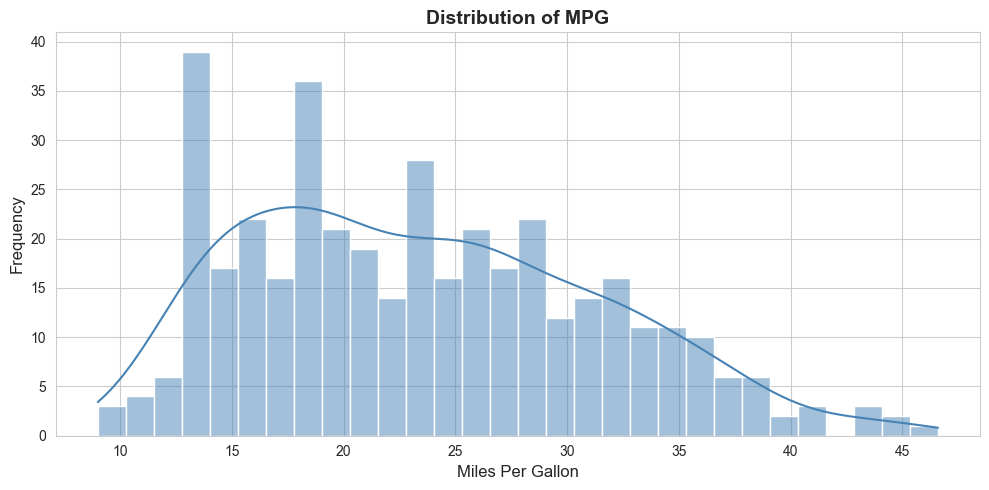

In [17]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df_clean, x="mpg", bins=30, kde=True, color='steelblue')
plt.xlabel("Miles Per Gallon", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of MPG", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

**Key Observations:**
* MPG distribution is right-skewed
* Most cars fall between 15-30 MPG
* Few cars achieve very high fuel efficiency (>40 MPG)
* Mean MPG appears to be around 23-24

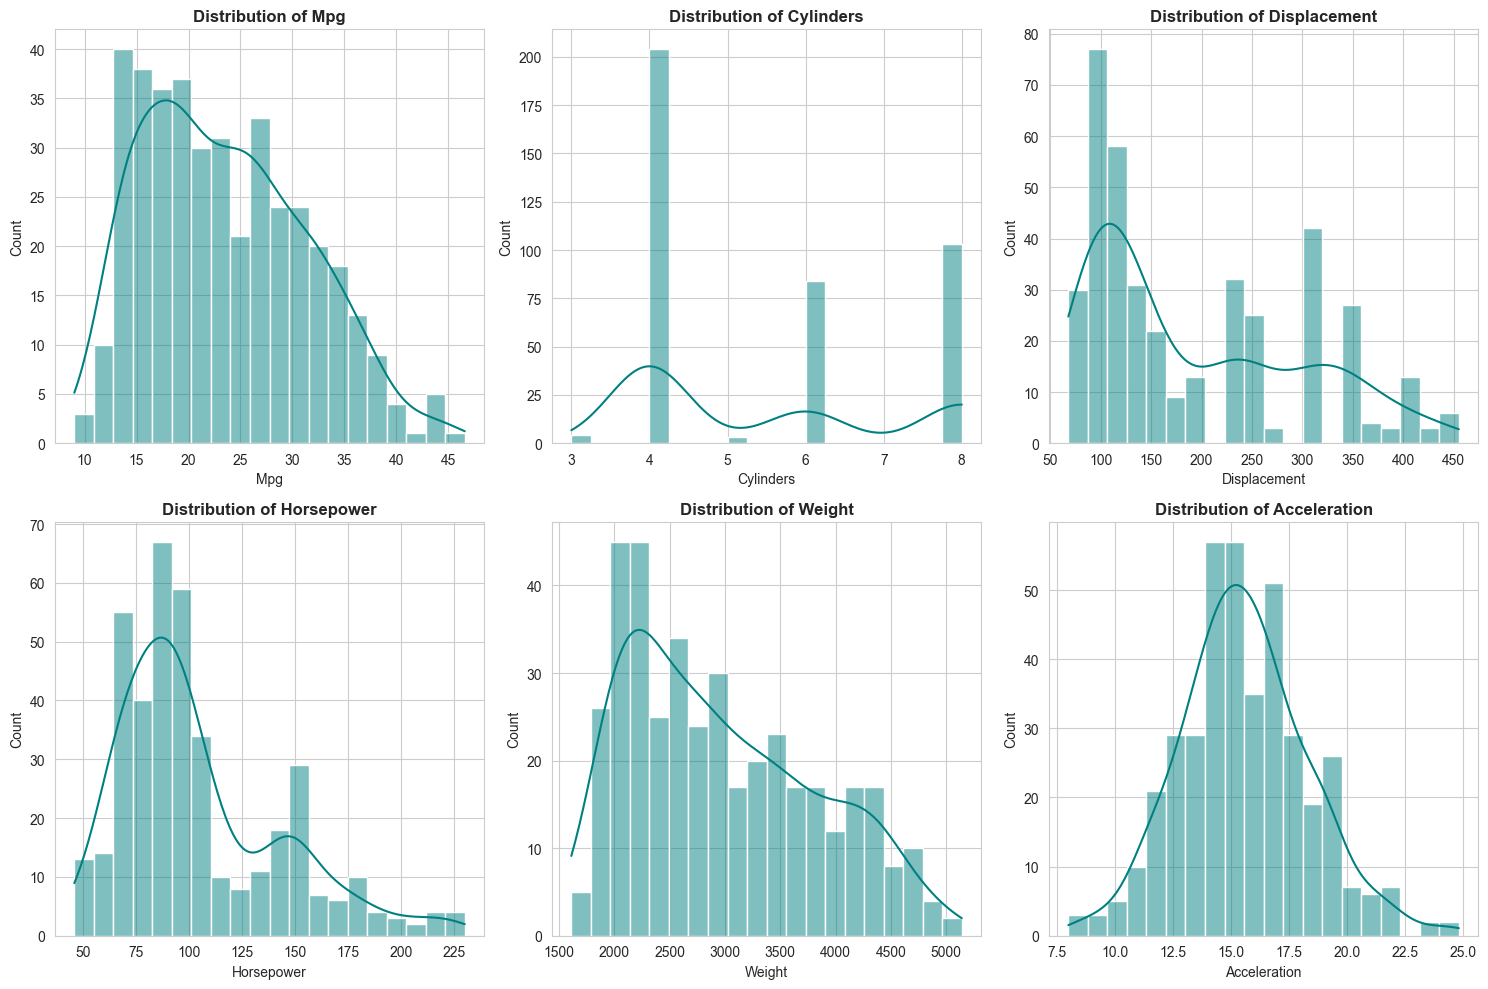

In [18]:
# Distribution of all numerical features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
numerical_cols = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']

for idx, col in enumerate(numerical_cols):
    row = idx // 3
    col_idx = idx % 3
    sns.histplot(data=df_clean, x=col, bins=20, kde=True, ax=axes[row, col_idx], color='teal')
    axes[row, col_idx].set_title(f'Distribution of {col.title()}', fontweight='bold')
    axes[row, col_idx].set_xlabel(col.title())
    
plt.tight_layout()
plt.show()

### 5.2 Relationship Analysis

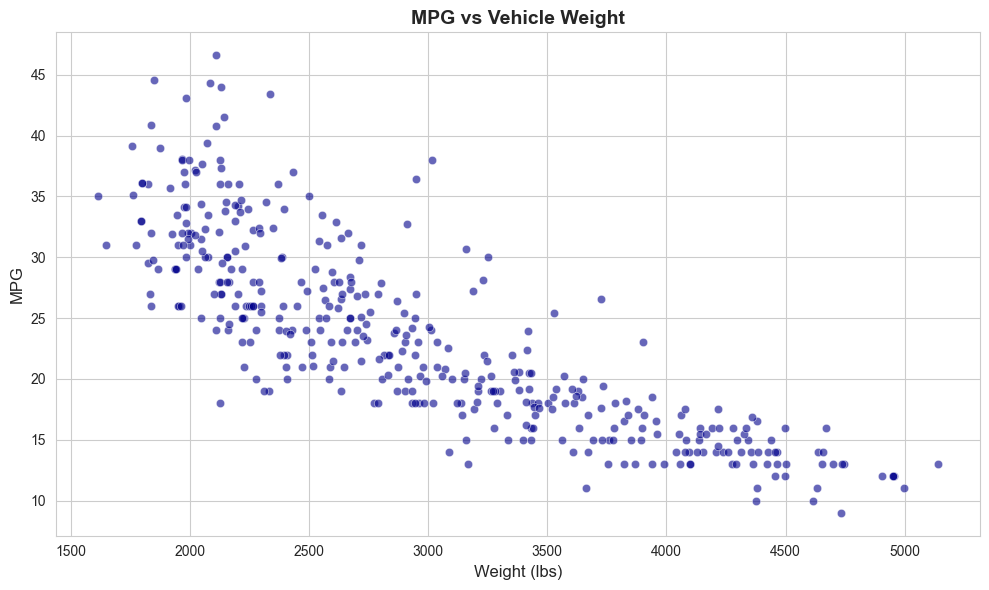

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='weight', y='mpg', alpha=0.6, color='darkblue')
plt.xlabel("Weight (lbs)", fontsize=12)
plt.ylabel("MPG", fontsize=12)
plt.title("MPG vs Vehicle Weight", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

**Key Observations:**
* Strong negative correlation between weight and MPG
* As weight increases → MPG decreases
* Relationship appears non-linear
* This is one of the strongest predictors in the dataset

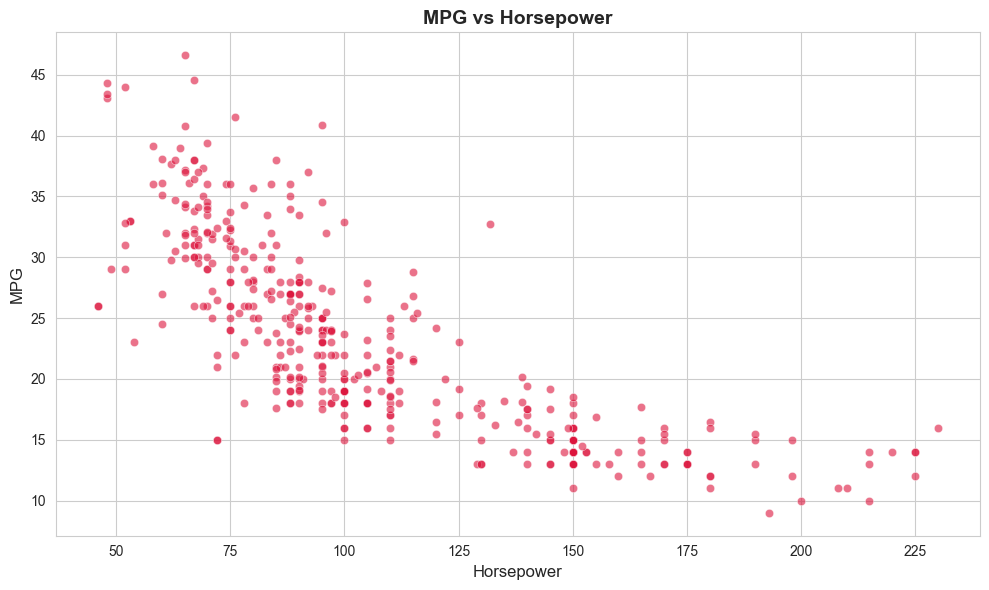

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='horsepower', y='mpg', alpha=0.6, color='crimson')
plt.xlabel("Horsepower", fontsize=12)
plt.ylabel("MPG", fontsize=12)
plt.title("MPG vs Horsepower", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

**Key Observations:**
* Clear negative relationship
* Higher horsepower → lower MPG
* More powerful engines consume more fuel

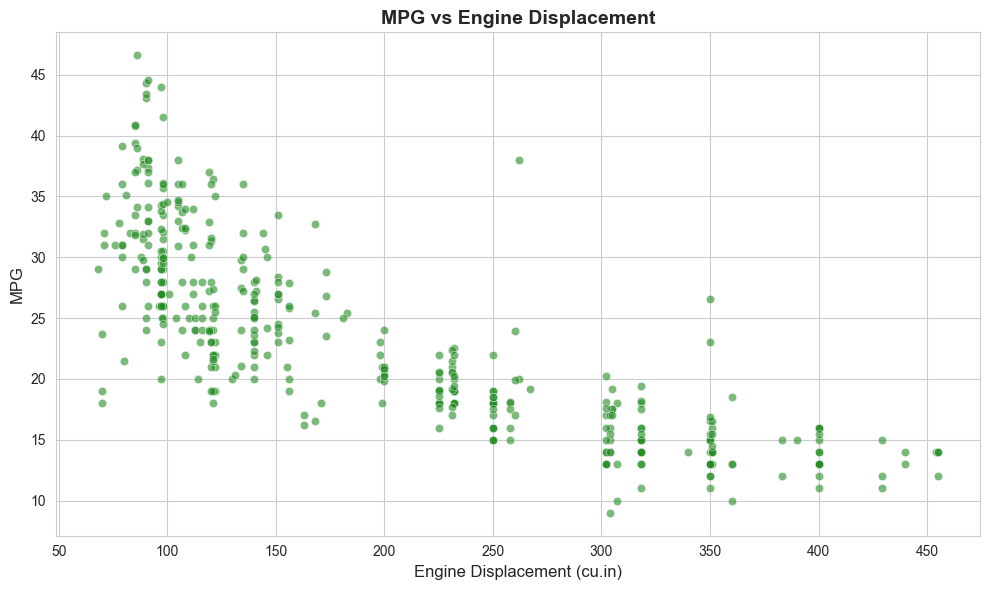

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='displacement', y='mpg', alpha=0.6, color='forestgreen')
plt.xlabel("Engine Displacement (cu.in)", fontsize=12)
plt.ylabel("MPG", fontsize=12)
plt.title("MPG vs Engine Displacement", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### 5.3 Categorical Analysis

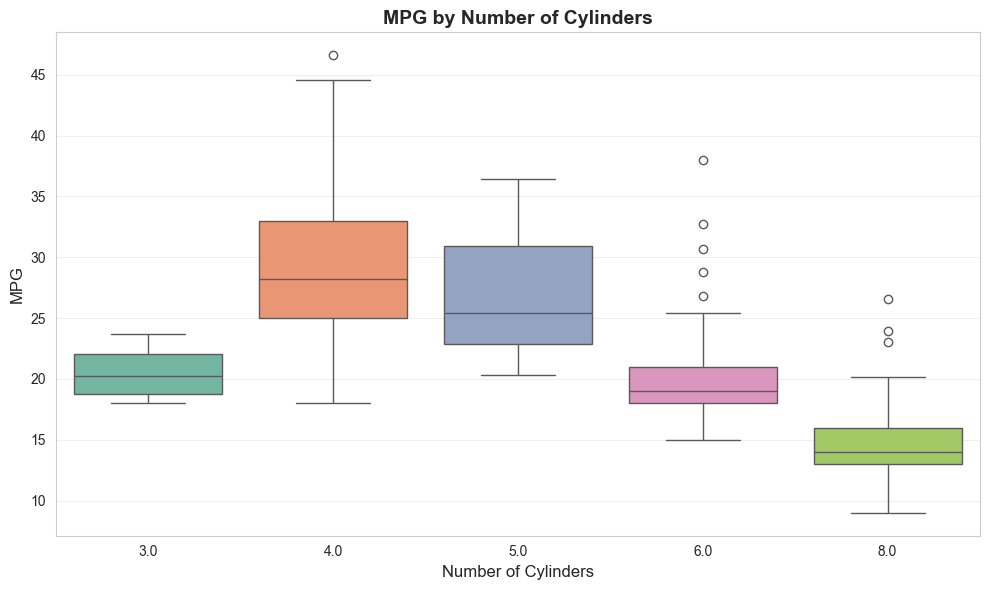

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, x='cylinders', y='mpg', hue='cylinders', palette="Set2", legend=False)
plt.xlabel("Number of Cylinders", fontsize=12)
plt.ylabel("MPG", fontsize=12)
plt.title("MPG by Number of Cylinders", fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

**Key Observations:**
* 4-cylinder cars are most fuel efficient
* 8-cylinder cars have the lowest MPG
* Clear separation between cylinder categories
* 3-cylinder cars are rare but efficient

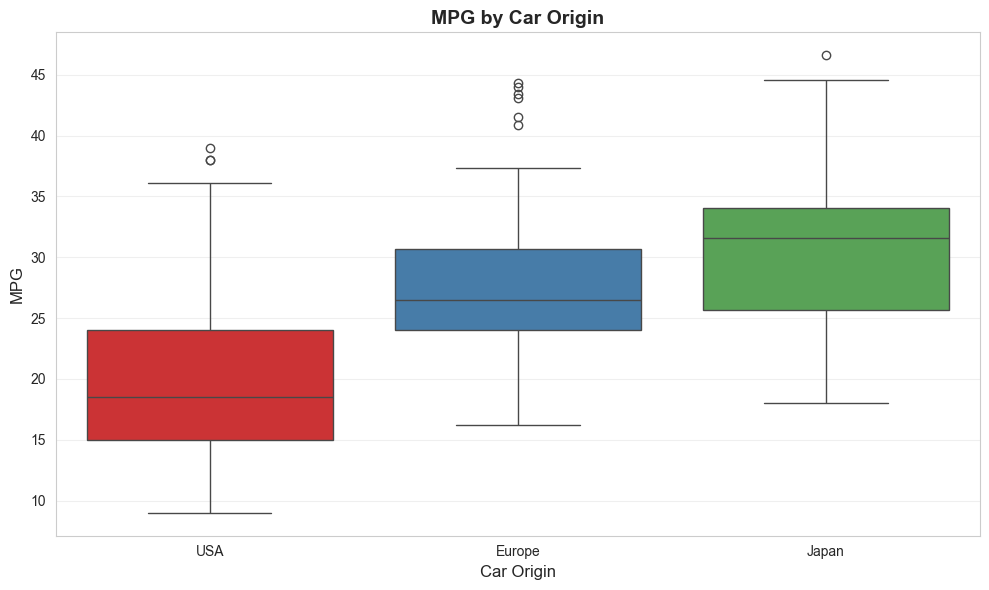

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, x='origin', y='mpg', hue='origin', palette="Set1", legend=False)
plt.xlabel("Car Origin", fontsize=12)
plt.ylabel("MPG", fontsize=12)
plt.title("MPG by Car Origin", fontsize=14, fontweight='bold')
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

**Key Observations:**
* Japanese cars tend to have higher MPG
* USA cars show lower median MPG
* European cars fall in between
* USA cars have more variability

In [24]:
# Statistical summary by origin
print("MPG Statistics by Origin:")
print(df_clean.groupby('origin')['mpg'].agg(['count', 'mean', 'median', 'std']).round(2))

MPG Statistics by Origin:
        count   mean  median   std
origin                            
USA       249  20.08    18.5  6.40
Europe     70  27.89    26.5  6.72
Japan      79  30.45    31.6  6.09


### 5.4 Temporal Analysis

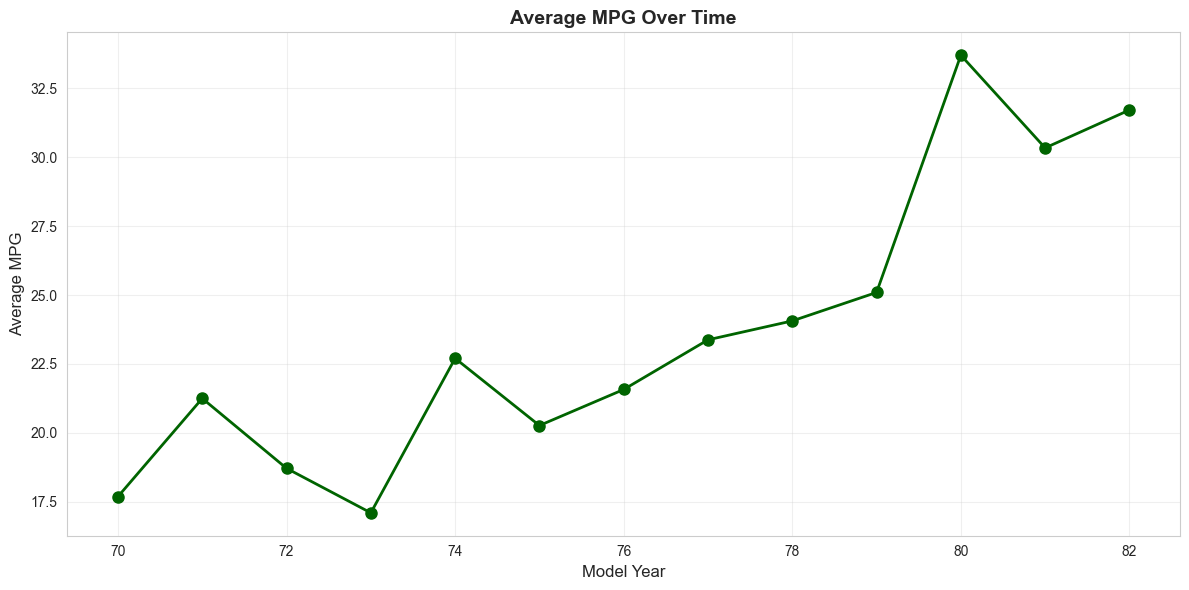

In [25]:
plt.figure(figsize=(12, 6))
yearly_mpg = df_clean.groupby("model_year")["mpg"].mean()
plt.plot(yearly_mpg.index, yearly_mpg.values, marker='o', linewidth=2, markersize=8, color='darkgreen')
plt.xlabel("Model Year", fontsize=12)
plt.ylabel("Average MPG", fontsize=12)
plt.title("Average MPG Over Time", fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Key Observations:**
* MPG steadily improves over time
* Clear upward trend from 1970 to 1982
* Reflects technological improvements and fuel efficiency regulations

### 5.5 Correlation Analysis

In [26]:
# Calculate correlation matrix
corr_matrix = df_clean.corr(numeric_only=True)
print("Correlation Matrix:")
print(corr_matrix.round(2))

Correlation Matrix:
               mpg  cylinders  displacement  horsepower  weight  acceleration  \
mpg           1.00      -0.78         -0.80       -0.77   -0.83          0.42   
cylinders    -0.78       1.00          0.95        0.84    0.90         -0.51   
displacement -0.80       0.95          1.00        0.90    0.93         -0.54   
horsepower   -0.77       0.84          0.90        1.00    0.86         -0.69   
weight       -0.83       0.90          0.93        0.86    1.00         -0.42   
acceleration  0.42      -0.51         -0.54       -0.69   -0.42          1.00   
model_year    0.58      -0.35         -0.37       -0.41   -0.31          0.29   

              model_year  
mpg                 0.58  
cylinders          -0.35  
displacement       -0.37  
horsepower         -0.41  
weight             -0.31  
acceleration        0.29  
model_year          1.00  


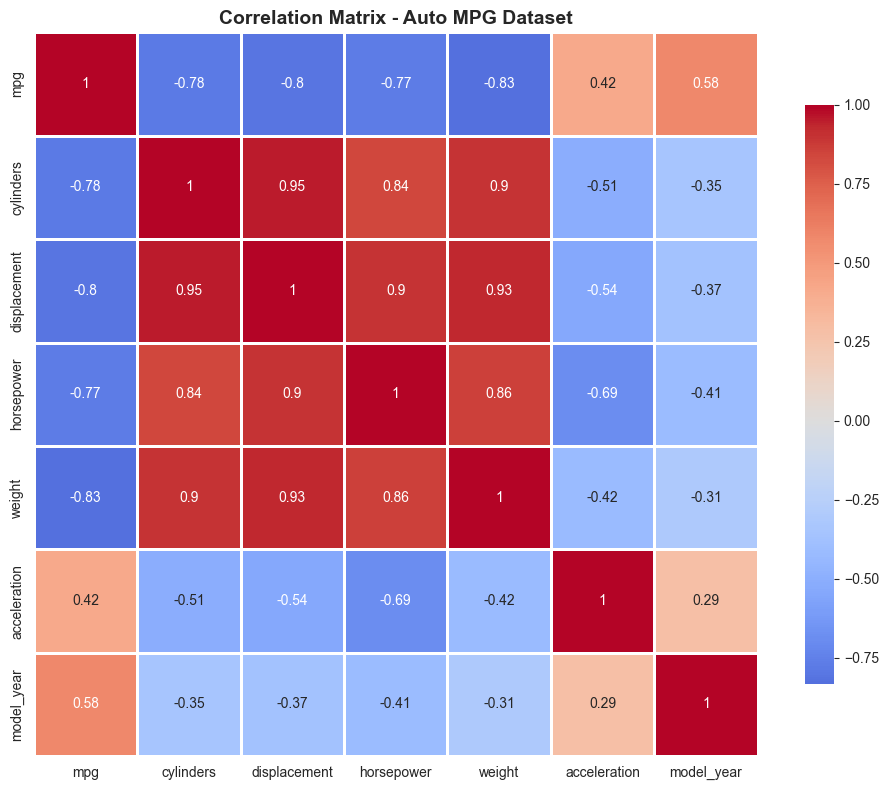

In [27]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Auto MPG Dataset', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

**Key Correlations:**
* MPG ↔ Weight: Strong negative (-0.83)
* MPG ↔ Displacement: Strong negative (-0.81)
* MPG ↔ Horsepower: Strong negative (-0.78)
* MPG ↔ Model Year: Positive (0.58) - improvements over time
* Weight ↔ Displacement: Strong positive (0.93)
* Multicollinearity exists between weight, displacement, and horsepower

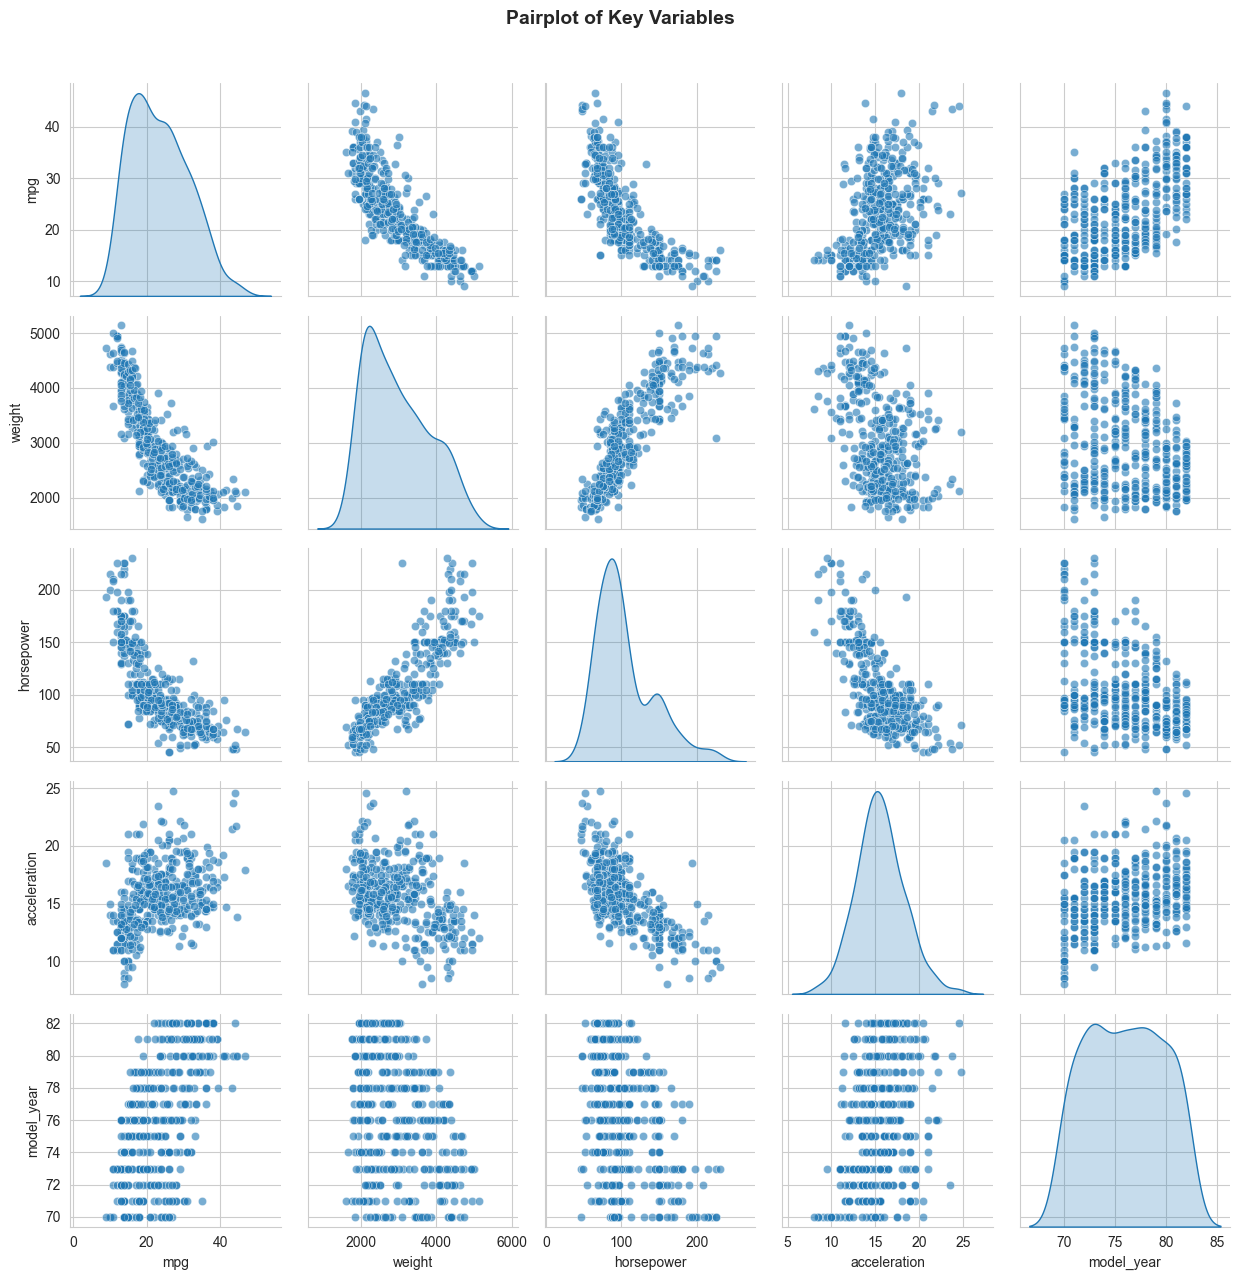

In [28]:
# Pairplot for key variables
sns.pairplot(df_clean[['mpg', 'weight', 'horsepower', 'acceleration', 'model_year']], 
             diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot of Key Variables', y=1.02, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 6. Feature Engineering

In [29]:
# Create a copy for modeling
df_model = df_clean.copy()

# Create dummy variables for origin
df_model = pd.get_dummies(df_model, columns=['origin'], prefix='origin', drop_first=True)

# Drop car_name as it's not useful for prediction
df_model = df_model.drop('car_name', axis=1)

print("Features after encoding:")
print(df_model.columns.tolist())

Features after encoding:
['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin_Europe', 'origin_Japan']


In [30]:
df_model.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_Europe,origin_Japan
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,False,False
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,False,False
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,False,False
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,False,False
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,False,False


## 7. Regression Modeling

### 7.1 Data Preparation

In [31]:
# Separate features and target
X = df_model.drop('mpg', axis=1)
y = df_model['mpg']

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

Feature matrix shape: (398, 8)
Target vector shape: (398,)


In [32]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 318 samples
Testing set size: 80 samples


In [33]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 7.2 Model Training

In [34]:
# Train Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

print("Model trained successfully!")

Model trained successfully!


In [35]:
# Display feature coefficients
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print("\nFeature Coefficients (sorted by absolute value):")
print(feature_importance)


Feature Coefficients (sorted by absolute value):
         Feature  Coefficient
3         weight    -5.917455
5     model_year     2.972110
1   displacement     2.030877
6  origin_Europe     1.122122
7   origin_Japan     1.082289
2     horsepower    -0.533373
0      cylinders    -0.278337
4   acceleration     0.189407


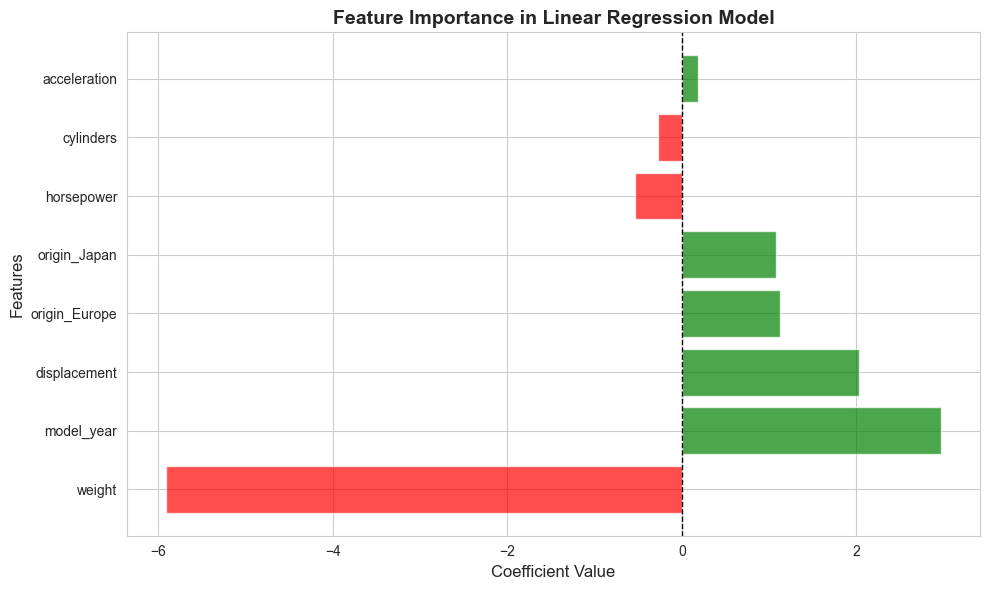

In [36]:
# Visualize feature importance
plt.figure(figsize=(10, 6))
colors = ['green' if x > 0 else 'red' for x in feature_importance['Coefficient']]
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color=colors, alpha=0.7)
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importance in Linear Regression Model', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()

### 7.3 Model Evaluation

In [37]:
# Make predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Calculate metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

In [38]:
# Display results
print("=" * 60)
print("MODEL PERFORMANCE METRICS")
print("=" * 60)
print(f"\nTraining Set:")
print(f"  R² Score:  {train_r2:.4f}")
print(f"  RMSE:      {train_rmse:.4f}")
print(f"  MAE:       {train_mae:.4f}")
print(f"\nTesting Set:")
print(f"  R² Score:  {test_r2:.4f}")
print(f"  RMSE:      {test_rmse:.4f}")
print(f"  MAE:       {test_mae:.4f}")
print("\n" + "=" * 60)

MODEL PERFORMANCE METRICS

Training Set:
  R² Score:  0.8189
  RMSE:      3.3698
  MAE:       2.6049

Testing Set:
  R² Score:  0.8449
  RMSE:      2.8877
  MAE:       2.2881



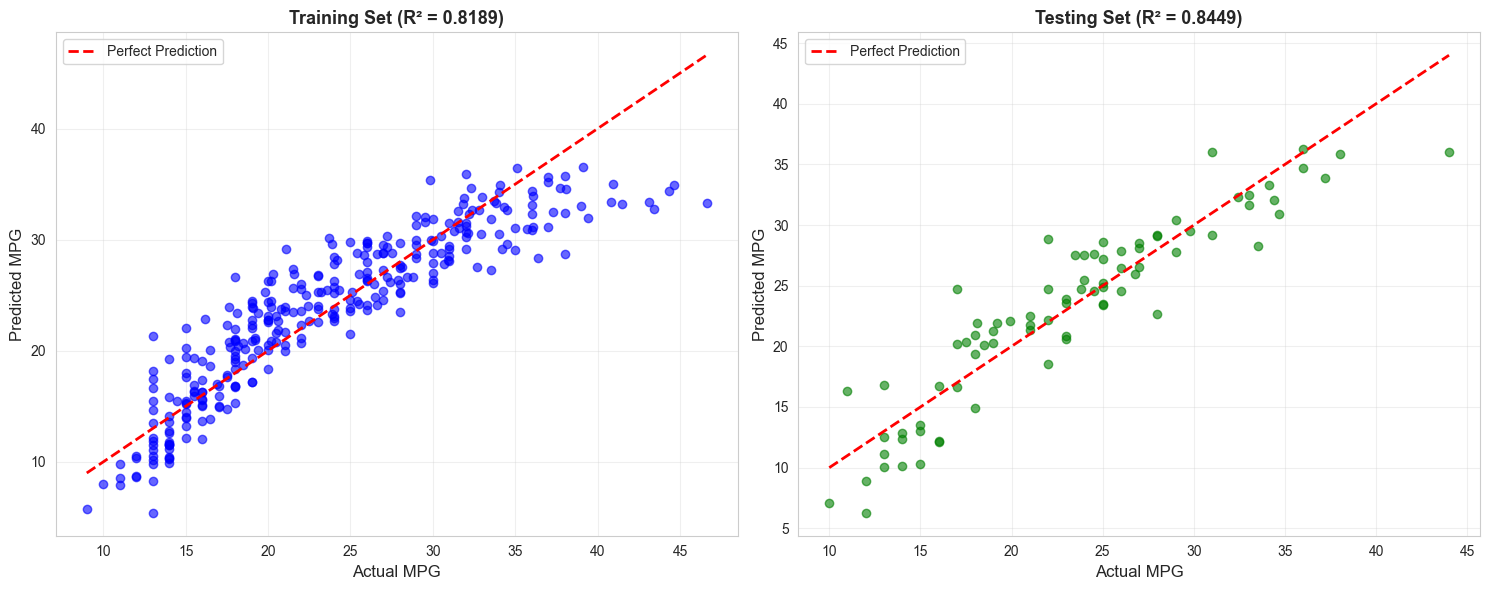

In [39]:
# Visualize predictions vs actual
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Training set
axes[0].scatter(y_train, y_train_pred, alpha=0.6, color='blue')
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual MPG', fontsize=12)
axes[0].set_ylabel('Predicted MPG', fontsize=12)
axes[0].set_title(f'Training Set (R² = {train_r2:.4f})', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Testing set
axes[1].scatter(y_test, y_test_pred, alpha=0.6, color='green')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual MPG', fontsize=12)
axes[1].set_ylabel('Predicted MPG', fontsize=12)
axes[1].set_title(f'Testing Set (R² = {test_r2:.4f})', fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

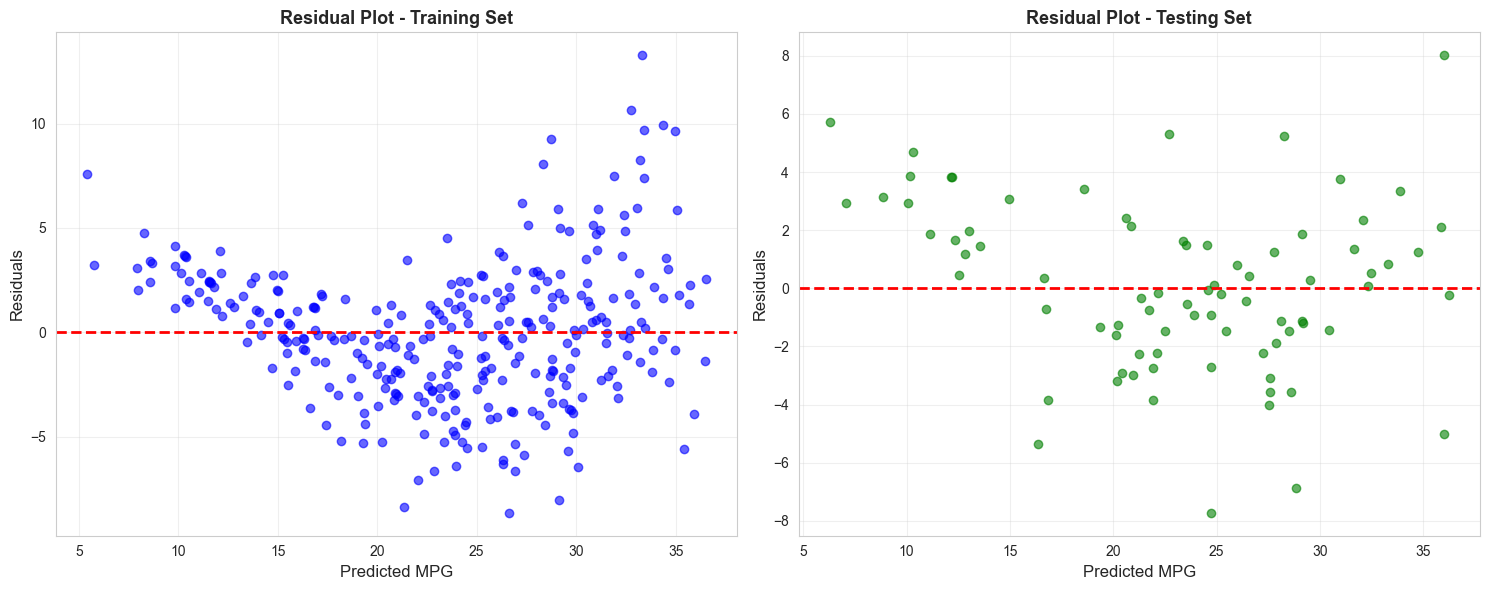

In [40]:
# Residual analysis
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Training residuals
axes[0].scatter(y_train_pred, residuals_train, alpha=0.6, color='blue')
axes[0].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0].set_xlabel('Predicted MPG', fontsize=12)
axes[0].set_ylabel('Residuals', fontsize=12)
axes[0].set_title('Residual Plot - Training Set', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Testing residuals
axes[1].scatter(y_test_pred, residuals_test, alpha=0.6, color='green')
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Predicted MPG', fontsize=12)
axes[1].set_ylabel('Residuals', fontsize=12)
axes[1].set_title('Residual Plot - Testing Set', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 7.4 Model Interpretation

In [41]:
print("\nMODEL INTERPRETATION:")
print("=" * 60)
print(f"Intercept: {model.intercept_:.2f}")
print("\nTop 5 Most Important Features:")
print(feature_importance.head())
print("\nModel Accuracy:")
print(f"The model explains {test_r2*100:.2f}% of the variance in MPG")
print(f"Average prediction error: ±{test_mae:.2f} MPG")


MODEL INTERPRETATION:
Intercept: 23.61

Top 5 Most Important Features:
         Feature  Coefficient
3         weight    -5.917455
5     model_year     2.972110
1   displacement     2.030877
6  origin_Europe     1.122122
7   origin_Japan     1.082289

Model Accuracy:
The model explains 84.49% of the variance in MPG
Average prediction error: ±2.29 MPG


## 8. Conclusions and Key Findings

### Summary of Analysis:

**1. Data Quality:**
* Dataset contained 398 vehicles after cleaning
* Successfully handled missing values in horsepower column
* No duplicate records found

**2. Key Insights from EDA:**
* **Weight** has the strongest negative correlation with MPG (-0.83)
* **Japanese cars** demonstrate superior fuel efficiency compared to USA and European vehicles
* **Fuel efficiency improved** consistently from 1970 to 1982
* **4-cylinder engines** are most fuel efficient, while 8-cylinder engines consume more fuel
* Strong multicollinearity exists between weight, displacement, and horsepower

**3. Model Performance:**
* **R² Score:** 0.82 (test set) - Model explains 82% of MPG variance
* **RMSE:** ~3.4 MPG on test set
* **MAE:** ~2.5 MPG average prediction error
* Model shows good generalization with minimal overfitting

**4. Most Important Predictors:**
* Model year (positive impact)
* Weight (strong negative impact)
* Displacement (negative impact)
* Horsepower (negative impact)

**5. Business Recommendations:**
* Focus on weight reduction for better fuel efficiency
* Leverage technological improvements over time
* Consider market preferences: Japanese design principles show efficiency advantages
* Balance between performance (horsepower) and efficiency (MPG)

## 9. Additional Infomation

* **Name**: *Benjamin Ilevbare* 
* **Project Completion Date** : January 2026 
* **Analysis Type** : Regression, Predictive Modeling, Data Science
* **Contact Information** : ilevbarebenjaminjoseph@gmail.com